# Hidden CKD

#### Variables
- Date of event: Date of the screening
- Gender: Gender of the patient (M: Male, F: Female)
- Ethnicity: The ethnicity of the participant
- D.O.B.: The date of birth of the participant
- Age: Age of the patient (years)
- Height (cm): Height of the participant in cm
- Weight (kg): Weight of the participant in kg
- BMI: BMI of the participant
- BMI Category: Classification of the particpant BMI according to NICE guidelines
- Systolic, Diastolic: The systolic and diastolic of the partcipants
- BP Category: Classification of the particpant BP according to NICE guidelines
- Medical Conditions: Medical conditions the patient has (High blood pressure, Diabetes, Kidney disease, Heart disease and Other
- What medications/tablets are you currently taking?: The kinds of medication the participants are taking (Cholesterol, BP, Diabetes, Other)
- Name of blood pressure medication / Tablets
- Name of blood pressure medication / Tablets
- Name of blood pressure medication / Tablets
- Do you have a family history of kidney disease?: Whether or not the participant has a family history of kidney disease
- uACR: Urine albumin to creatinine ratio of the participants as measured using a urine dipstick (Normal, Abnormal, High Abnormal)

In [9]:
import numpy as np
import pandas as pd

In [10]:
raw_data=pd.read_csv('https://raw.githubusercontent.com/edwardbensa/hidden-ckd/main/data/raw/hidden_ckd_raw.csv')

# **Cleaning and Preprocessing Raw Data**

In [11]:
# Filtering out all rows with uACR results that are not Normal, Abnormal or High Abnormal
raw_data = raw_data[(raw_data['uACR'] == "Normal") | (raw_data['uACR'] == "Abnormal") | (raw_data['uACR'] == "High abnormal")]

In [12]:
# Renaming specific row values
raw_data['uACR']=raw_data['uACR'].replace({'High abnormal': 'High Abnormal'})
raw_data['Ethnicity'] = raw_data['Ethnicity'].replace({'Black African ' : 'Black African (unspecified)',
                                                       'Black African' : 'Black African (unspecified)'})

In [13]:
# Adding a "Simplified Ethnicity" column
raw_data['S_Ethnicity'] = raw_data['Ethnicity'].replace({
    'Black African' : 'Black',
    'Black African (Central Africa)' : 'Black',
    'Black African (East Africa)' : 'Black',
    'Black African (North Africa)' : 'Black',
    'Black African (South Africa)' : 'Black',
    'Black African (West Africa)' : 'Black',
    'Black African (unspecified)' : 'Black',
    'Black Caribbean' : 'Black',
    'Black other' : 'Black',
    'Indian' : 'Indian',
    'Mixed White/Asian' : 'Mixed',
    'Mixed White/Black African' : 'Mixed',
    'Mixed White/Black Caribbean' : 'Mixed',
    'Mixed other' : 'Mixed',
    'Pakistani' : 'Indian',
    'White British' : 'White',
    'White Gypsy/Traveller' : 'White',
    'White Irish' : 'White',
    'White other' : 'White',
    'Any other' : 'Other',
    'Asian other' : 'SE Asian',
    'Bangladeshi' : 'Indian'})

In [14]:
# Adding another column that simply shows whether the ethicity is black or not
raw_data['Ethnicity_Black'] = raw_data['Ethnicity'].str.contains('Black')

In [15]:
# Dropping the one gender outlier 'Prefer not to say' (sample size of gender='Prefer not to say' = 1. This may interfere with analysis)
raw_data.drop(raw_data[raw_data.Gender == 'Prefer not to say'].index, inplace=True)

# Dropping an outlier whose date of birth was recorded as 10/09/2023
raw_data.drop(raw_data[raw_data['D.O.B.'] == "10/09/2023"].index, inplace=True)

# Dropping the one BMI outlier whose BMI Category is 'Underweight' (sample size = 1. May interfere with analysis)
raw_data.drop(raw_data[raw_data['BMI Category'] == "UNDERWEIGHT"].index, inplace=True)

In [16]:
# Splitting the "Medical Conditions" column into the constituent medical conditions
raw_data['Has_High_BP'] = raw_data['Medical Conditions'].apply(lambda x: 'High blood pressure' in x)
raw_data['Has_Diabetes'] = raw_data['Medical Conditions'].apply(lambda x: 'Diabetes' in x)
raw_data['Has_KD'] = raw_data['Medical Conditions'].apply(lambda x: 'Kidney disease' in x)
raw_data['Has_HD'] = raw_data['Medical Conditions'].apply(lambda x: 'Heart disease (heart attack, angina, heart failure)' in x)
raw_data['Has_Other'] = raw_data['Medical Conditions'].apply(lambda x: 'Other' in x)

# Splitting the "What medications/tablets are you currently taking? -" column into the constituent forms of medication
raw_data['BP_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Blood pressure medication' in x)
raw_data['Diabetes_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Diabetes medication' in x)
raw_data['Cholesterol_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Cholesterol medication (e.g. Statin)' in x)
raw_data['Other_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Other' in x)

In [17]:
data = raw_data.rename({"Date of event": "Date",
                        "D.O.B.": "DOB", 
                        "Height (cm)": "Height",
                        "Weight(kg)": "Weight",
                        "BMI Category": "BMI_Category",
                        "BP Category": "BP_Category",
                        "Do you have a family history of  kidney disease?":"Family_KD"},
                       axis=1)

In [18]:
data['Age'] = data['Age'] = (pd.to_datetime(data['Date'], dayfirst = True) - pd.to_datetime(data['DOB'], dayfirst = True)) / np.timedelta64(1, 'D') / 365
data['Age'] = data['Age'].round(1)

In [19]:
data['Age_Category'] = pd.cut(data['Age'], bins=[0, 25, 40, 55, 70, float('inf')], labels=['<25', '25-40', '41-55', '56-70', '>70']).astype(str)

In [20]:
data = data[['Date', 'Gender', 'Ethnicity', 'S_Ethnicity', 'Ethnicity_Black', 'DOB', 'Age', 'Age_Category', 'Height', 'Weight', 'BMI', 'BMI_Category', 'Systolic', 'Diastolic', 'BP_Category', 'Has_High_BP', 'Has_Diabetes', 'Has_KD', 'Has_HD', 'BP_Meds', 'Diabetes_Meds', 'Cholesterol_Meds', 'Other_Meds', 'Family_KD', 'uACR']]

In [21]:
data = data.reset_index(drop=True)

In [22]:
data.head(5)

,Date,Gender,Ethnicity,S_Ethnicity,Ethnicity_Black,DOB,Age,Age_Category,Height,Weight,...,Has_High_BP,Has_Diabetes,Has_KD,Has_HD,BP_Meds,Diabetes_Meds,Cholesterol_Meds,Other_Meds,Family_KD,uACR
0,23/10/2022,Male,Black Caribbean,Black,True,21/05/1946,76.5,>70,161.0,64.0,...,False,False,False,False,False,False,False,False,Definitely not,Abnormal
1,23/10/2022,Male,Black African (West Africa),Black,True,25/01/1970,52.8,41-55,163.0,78.0,...,False,False,False,False,False,False,False,False,Definitely not,Abnormal
2,26/08/2023,Male,Black Caribbean,Black,True,14/07/2005,18.1,<25,167.0,91.0,...,False,False,False,False,False,False,False,False,Definitely not,Normal
3,28/04/2023,Male,Black Caribbean,Black,True,25/04/1969,54.0,41-55,168.0,87.0,...,False,False,False,False,False,False,False,False,Definitely not,Abnormal
4,06/11/2022,Female,Black African (West Africa),Black,True,03/11/1979,43.0,41-55,187.0,109.0,...,False,False,False,False,False,False,False,False,Definitely not,Abnormal


# **Exploratory Data Analysis**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
data.describe()

,Age,Height,Weight,BMI,Systolic,Diastolic
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,50.901457,165.813309,81.799761,29.841207,136.210198,82.668054
std,14.165017,9.140738,15.422907,5.720421,20.212144,11.863947
min,14.400000,111.500000,45.500000,19.000000,88.000000,45.000000
25%,42.100000,159.000000,71.000000,25.800000,123.000000,75.000000
50%,52.900000,165.000000,80.200000,29.200000,134.000000,82.000000
75%,60.300000,171.000000,90.000000,32.900000,146.000000,90.000000
max,92.100000,198.000000,169.000000,62.100000,243.000000,141.000000


In [25]:
# Pairwise Pearson correlations between numeric variables
cr = data[['Age', 'Height', 'Weight', 'BMI', 'Systolic', 'Diastolic']].corr(method='pearson')

fig = go.Figure(go.Heatmap(
    x=cr.columns,
    y=cr.columns,
    z=cr.values.tolist(),
    colorscale='rdylgn', zmin=-1, zmax=1
))

fig.show()

Systolic and diastolic BP readings are weakly positively correlated with age and weight as expected

## **Grouped/Aggregated Statistics**

In [26]:
# Creating a function to group variables

def group_stats(column_name):
    '''
    Groups the data and runs some basic stats
    '''
    table = {
        column_name: data[column_name].sort_values().unique(),
        'Mean Age': data.groupby(column_name)['Age'].mean().round(2),
        'Mean Height (cm)': data.groupby(column_name)['Height'].mean().round(2),
        'Mean Weight (kg)': data.groupby(column_name)['Weight'].mean().round(2),
        'Mean BMI': data.groupby(column_name)['BMI'].mean().round(2),
        'Mean Systolic': data.groupby(column_name)['Systolic'].mean().round(2),
        'Mean Diastolic': data.groupby(column_name)['Diastolic'].mean().round(2),
        'Count': data.groupby(column_name).size(),
        'Normal uACR %': round(data[(data['uACR'] == 'Normal')].groupby([column_name]).size()/data.groupby(column_name).size()*100, 2),
        'Abnormal uACR %': round(data[(data['uACR'] == 'Abnormal')].groupby([column_name]).size()/data.groupby(column_name).size()*100, 2),
        'High Abnormal uACR %': round(data[(data['uACR'] == 'High Abnormal')].groupby([column_name]).size()/data.groupby(column_name).size()*100, 2),
        }
    table = pd.DataFrame(table).set_index(column_name).fillna(0)

    return table

In [27]:
eth_data = group_stats('Ethnicity')
eth_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
Ethnicity,,,,,,,,,,
Any other,53.28,170.88,97.35,33.10,133.25,82.25,4,75.00,25.00,0.00
Asian other,50.09,168.34,84.01,29.66,128.96,78.87,23,65.22,30.43,4.35
Bangladeshi,59.20,167.91,80.63,28.44,152.71,84.71,7,85.71,14.29,0.00
Black African (Central Africa),51.42,168.65,83.70,29.49,138.00,83.93,15,66.67,33.33,0.00
Black African (East Africa),47.48,163.08,78.08,29.44,128.24,79.24,21,47.62,42.86,9.52
Black African (North Africa),54.88,170.75,77.33,26.58,130.00,80.83,6,83.33,16.67,0.00
Black African (South Africa),46.72,164.92,82.48,30.28,126.00,78.50,6,16.67,83.33,0.00
Black African (West Africa),50.98,166.03,81.88,29.79,136.51,82.84,499,52.91,39.68,7.41
Black African (unspecified),51.32,164.79,81.33,30.13,136.57,83.36,149,51.68,41.61,6.71


The vast majority of the project participants are Black. It would not be helpful to attempt to make inferences based on 'Ethnicity' given how unbalanced it is.

In [28]:
s_eth_data = group_stats('S_Ethnicity')
s_eth_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
S_Ethnicity,,,,,,,,,,
Black,50.88,165.83,81.55,29.75,136.17,82.66,817,52.63,41.00,6.36
Indian,52.01,168.48,82.23,29.08,141.31,84.91,32,78.12,21.88,0.00
Mixed,56.42,163.27,82.89,31.05,140.85,82.67,33,54.55,36.36,9.09
Other,53.28,170.88,97.35,33.10,133.25,82.25,4,75.00,25.00,0.00
SE Asian,50.09,168.34,84.01,29.66,128.96,78.87,23,65.22,30.43,4.35
White,47.23,164.03,82.64,30.78,134.21,83.06,52,75.00,21.15,3.85


This table begins to open up some key insights. It appears that participants who are Black or are of Black descent are at the highest risk of high abnormal uACR readings, which is consistent with literature (a quick peak at the breakdown for the 'Mixed' Simplified Ethnicity shows that only Mixed people of Black descent have high abnormal uACR readings). None of the participants classed 'Indian' (i.e. Indian, Pakistani, and Bangladeshi) have high abnormal uACR readings. Across the board, it appears Black people have a higher risk of abnormal and high abnormal uACR even if they do not have the highest BP readings, which is a risk factor for abnormal uACR values.

In [29]:
eth_black_data = group_stats('Ethnicity_Black')
eth_black_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
Ethnicity_Black,,,,,,,,,,
False,49.79,165.99,83.38,30.31,135.52,82.78,118,73.73,23.73,2.54
True,51.06,165.79,81.58,29.78,136.31,82.65,843,52.55,40.93,6.52


This table further drives home the point that Black people are at increased risk of abnormal uACR readings.

In [30]:
gender_data = group_stats('Gender')
gender_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
Gender,,,,,,,,,,
Female,51.20,165.57,81.31,29.74,136.80,82.57,540,51.11,43.89,5.00
Male,50.52,166.12,82.43,29.97,135.46,82.80,421,60.33,32.30,7.36


This table shows that for comparable BMI and BP readings, females are at moderately increased risk of having abnormal uACR readings. This could be due to undertesting on the part of males or due to the naturally increased protein levels in the urine of females.

In [31]:
age_data = group_stats('Age_Category').iloc[[3,0,1,2,4], :]
age_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
Age_Category,,,,,,,,,,
<25,21.80,168.81,74.43,26.11,126.37,75.19,52,71.15,28.85,0.00
25-40,33.32,167.09,79.95,28.70,127.67,80.11,157,63.69,28.66,7.64
41-55,48.45,166.07,84.44,30.67,136.43,83.81,354,55.93,39.83,4.24
56-70,61.02,165.06,81.79,30.15,139.54,84.20,327,49.54,43.73,6.73
>70,76.71,162.97,78.17,29.56,145.89,81.03,71,46.48,40.85,12.68


Age is quite clearly an important risk factor for abnormal uACR readings (as BP readings also increase)

In [32]:
bp_cat_data = group_stats('BP_Category').iloc[[3,4,0,1,2], :]
bp_cat_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
BP_Category,,,,,,,,,,
NORMAL,48.26,165.70,79.84,29.16,123.15,75.95,540,58.89,36.48,4.63
PRE HPT,53.67,165.82,83.43,30.49,144.04,88.72,156,48.72,44.87,6.41
HPT 1,53.57,165.79,84.34,30.81,151.25,90.05,197,55.84,37.06,7.11
HPT 2,58.33,167.53,86.83,30.94,174.63,98.81,59,38.98,47.46,13.56
HPT CRISIS,54.60,161.84,82.59,31.43,202.78,113.67,9,33.33,55.56,11.11


High BP is a key contributor to abnormal uACR readings.

In [33]:
fam_data = group_stats('Family_KD')
fam_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
Family_KD,,,,,,,,,,
Definitely not,50.55,165.40,81.09,29.72,134.60,82.09,511,51.47,42.86,5.68
Definitely yes,50.80,166.41,80.62,29.09,135.81,81.42,36,61.11,30.56,8.33
Not sure,51.35,166.27,82.78,30.06,138.23,83.50,414,59.18,34.54,6.28


There is a moderate increase in abnormal uACR readings in participants who definitely have a family history of kidney disease compared with those who do not. Readings are abit of a mixed bag for participants who are not sure. With that said, literature indicates that a troubling proportion of CKD cases in the UK go undiagnosed.

In [34]:
bmi_data = group_stats('BMI_Category').iloc[[0,2,1], :]
bmi_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
BMI_Category,,,,,,,,,,
HEALTHY,46.97,169.20,66.08,23.01,129.62,78.53,184,63.59,31.52,4.89
OVERWEIGHT,51.12,166.88,76.98,27.57,135.69,82.35,361,57.06,38.50,4.43
OBESE,52.45,163.39,92.94,34.83,139.57,84.78,416,49.76,42.31,7.93


BMI is an important factor in determining one's risk of abnormal uACR readings.

In [35]:
hkd_data = group_stats('Has_KD')
hkd_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
Has_KD,,,,,,,,,,
False,50.83,165.82,81.86,29.86,136.16,82.65,945,55.77,38.52,5.71
True,55.22,165.35,78.48,28.86,139.25,83.75,16,18.75,56.25,25.00


Obviously, participants with kidney disease are far more likely to have abnormal uACR readings than those without it.

In [36]:
hdiabetes_data = group_stats('Has_Diabetes')
hdiabetes_data

,Mean Age,Mean Height (cm),Mean Weight (kg),Mean BMI,Mean Systolic,Mean Diastolic,Count,Normal uACR %,Abnormal uACR %,High Abnormal uACR %
Has_Diabetes,,,,,,,,,,
False,49.93,166.26,82.02,29.77,135.83,82.84,863,56.78,38.01,5.21
True,59.46,161.89,79.85,30.46,139.55,81.11,98,40.82,45.92,13.27


Diabetes is an important risk factor in the development and progression of kidney disease. This is as a result of the gradual damage diabetes causes to the kidneys over time.

## **Data Visualisations**

In [37]:
hist_features = ['Age', 'Height', 'Weight', 'BMI', 'Systolic', 'Diastolic']
colour = 'DarkOrange'

# Initialize subplots
fig = make_subplots(rows=2, cols=1, row_heights=[0.2, 0.8], shared_xaxes=True)

# Add Traces with visibility settings
for idx, feature in enumerate(hist_features):
    fig.add_trace(go.Histogram(
        x=data[feature],
        nbinsx=len(np.histogram_bin_edges(data[feature], bins='fd')),
        name=feature,
        marker_color=colour,
        visible=(idx == 0)
    ), row=2, col=1)
    fig.add_trace(go.Box(
        x=data[feature],
        marker_symbol='line-ns-open',
        boxpoints='all',
        jitter=0,
        hoveron='points',
        name=feature,
        marker_color=colour,
        visible=(idx == 0)
    ), row=1, col=1)


# Add buttons
fig.update_layout(
    updatemenus=[
        dict(
            direction="down",
            showactive=True,
            x=-0.2,
            xanchor='left',
            y=0.9,
            yanchor='top',
            buttons=list([
                dict(label=feature,
                     method="update",
                     args=[{"visible": [(i // 2 == idx) for i in range(len(hist_features) * 2)]},
                          {"xaxis2.title": feature}])
                for idx, feature in enumerate(hist_features)
            ]),
        )
    ],
    showlegend=False,
    title=dict(text='Histograms', x=0.01),
    yaxis1_title="",
    xaxis2_title=hist_features[0], # Default x-axis title for the first histogram
    yaxis2_title='Count', # y-axis title
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Feature:", showarrow=False,
        x = -0.2, xref="paper", y=1, yref="paper", align="left")
    ]
)

# Set plot size and add a bar gap
fig.update_layout(
    autosize=False,
    width=1100,
    height=400,
    margin=dict(l=20, r=20, t=50, b=20),
    bargap=0.15
)


fig.show()

Height, Weight, and BMI data are skewed.

In [38]:
# Variables
x_vars = ['uACR', 'BP_Category', 'S_Ethnicity']
y_var = 'Age'
k_var = ['BMI_Category', 'BP_Category', 'S_Ethnicity', 'Ethnicity_Black', 'Gender']
colour_list = ['DarkOrange', 'Sienna', 'Chocolate', 'DarkSalmon', 'Coral', 'SandyBrown']

# Initial x_var
current_x_var = x_vars[0]

fig = go.Figure()

# Add traces for each combination of k_var values
for a in k_var:
    for col, k in enumerate(data[a].unique()):
        fig.add_trace(
            go.Bar(
                name=f'{k}',
                x=data[current_x_var].unique(),
                y=[data[y_var][(data[current_x_var] == x) & (data[a] == k)].mean() for x in data[current_x_var].unique()],
                marker_color=colour_list[col],
                visible=a == k_var[0],
            )
        )

# Create buttons for each k_var
buttons_k_var = []
for a in k_var:
    buttons_k_var.append(dict(
        method='update',
        label=a,
        args=[{
            'visible': [a == current for current in k_var for _ in data[current].unique()],
            'title.text': f'Mean Age by {a} and {current_x_var}'
        }]
    ))

# Create buttons for each x_var
buttons_x_var = []
for x in x_vars:
    buttons_x_var.append(dict(
        method='update',
        label=x,
        args=[{
            'x': [data[x].unique()] * len(k_var) * data[k_var[0]].nunique(),
            'y': [[data[y_var][(data[x] == val) & (data[a] == k)].mean() for val in data[x].unique()] for a in k_var for k in data[a].unique()],
            'title.text': f'Mean Age by {k_var[0]} and {x}'
        }]
    ))

# Update layout with dropdowns
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons_x_var,
            direction='down',
            showactive=True,
            x=-0.3,
            xanchor='left',
            y=0.9,
            yanchor='top'
        ),
        dict(
            buttons=buttons_k_var,
            direction='down',
            showactive=True,
            x=-0.3,
            xanchor='left',
            y=0.6,
            yanchor='top'
        )
    ],
    barmode='group',
    title=dict(text='Bivariate Analysis (Age)', x=0.01),
    yaxis_title='Mean Age',
    autosize=False,
    width=1100,
    height=350,
    margin=dict(l=20, r=20, t=50, b=20)
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select x Variable:", showarrow=False,
             x=-0.3, xref="paper", y=1, yref="paper", align="left"),
        dict(text="Select Feature:", showarrow=False,
             x=-0.3, xref="paper", y=0.7, yref="paper", align="left")
    ]
)

fig.show()


Chart Results
- The charts show that Black people turn out with high abnormal uACR results more than 10 years younger than non Black people.
- Black people turn out with HPT crisis results about 10 years before non black poeple.

In [39]:
# Importing libraries
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [40]:
# Performing two-way ANOVA between Age, Ethnicity_Black and uACR
model = ols(
    'Age ~ C(Ethnicity_Black) + C(uACR) +\
    C(Ethnicity_Black):C(uACR)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Ethnicity_Black),27.977277,1.0,0.141317,0.707059
C(uACR),2941.980188,2.0,7.430153,0.000628
C(Ethnicity_Black):C(uACR),446.744571,2.0,1.128281,0.324020
Residual,189066.848542,955.0,NaN,NaN


In [41]:
# Performing two-way ANOVA between Age, Ethnicity_Black and BP_Category
model = ols(
    'Age ~ C(Ethnicity_Black) + C(BP_Category) +\
    C(Ethnicity_Black):C(BP_Category)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Ethnicity_Black),150.217829,1.0,0.783264,3.763686e-01
C(BP_Category),9728.720811,4.0,12.681839,4.653150e-10
C(Ethnicity_Black):C(BP_Category),339.792016,4.0,0.442935,7.776100e-01
Residual,182387.060474,951.0,NaN,NaN


In [42]:
import scipy.stats as stats

In [43]:
cross_eth_uacr = pd.crosstab(data['Ethnicity_Black'], data['uACR'])
stats.chi2_contingency(cross_eth_uacr)

Chi2ContingencyResult(statistic=19.024002327845235, pvalue=7.395888968551565e-05, dof=2, expected_freq=array([[ 45.80020812,   7.12174818,  65.0780437 ],
       [327.19979188,  50.87825182, 464.9219563 ]]))

In [44]:
cross_eth_bpcat = pd.crosstab(data['Ethnicity_Black'], data['BP_Category'])
stats.chi2_contingency(cross_eth_bpcat)

Chi2ContingencyResult(statistic=16.071001337530294, pvalue=0.0029253553108120017, dof=4, expected_freq=array([[ 24.18938606,   7.24453694,   1.10509886,  66.30593132,
         19.15504683],
       [172.81061394,  51.75546306,   7.89490114, 473.69406868,
        136.84495317]]))

In [45]:
import researchpy as rp

In [46]:
crosstab, test_results, expected = rp.crosstab(data["Ethnicity_Black"], data["uACR"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

/opt/anaconda3/envs/vanilla/lib/python3.12/site-packages/researchpy/crosstab.py:146: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 2.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,19.0240
1,p-value =,0.0001
2,Cramer's V =,0.1407


In [47]:
crosstab, test_results, expected = rp.crosstab(data["Ethnicity_Black"], data["BP_Category"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

test_results

/opt/anaconda3/envs/vanilla/lib/python3.12/site-packages/researchpy/crosstab.py:146: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 4.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,16.0710
1,p-value =,0.0029
2,Cramer's V =,0.1293


In [48]:
data['Pulse Pressure'] = data['Systolic'] - data['Diastolic']

# Variables
x_vars = ['uACR', 'BMI_Category', 'BP_Category', 'Ethnicity_Black', 'Gender']
y_var = 'Pulse Pressure'
k_var = ['BMI_Category', 'BP_Category', 'S_Ethnicity', 'Ethnicity_Black', 'Gender', 'uACR']
colour_list = ['DarkOrange', 'Sienna', 'Chocolate', 'DarkSalmon', 'Coral', 'SandyBrown']

# Initial x_var
current_x_var = x_vars[0]

fig = go.Figure()

# Add traces for each combination of k_var values
for a in k_var:
    for col, k in enumerate(data[a].unique()):
        fig.add_trace(
            go.Bar(
                name=f'{k}',
                x=data[current_x_var].unique(),
                y=[data[y_var][(data[current_x_var] == x) & (data[a] == k)].mean() for x in data[current_x_var].unique()],
                marker_color=colour_list[col],
                visible=a == k_var[0],
            )
        )

# Create buttons for each k_var
buttons_k_var = []
for a in k_var:
    buttons_k_var.append(dict(
        method='update',
        label=a,
        args=[{
            'visible': [a == current for current in k_var for _ in data[current].unique()],
            'title.text': f'Mean Age by {a} and {current_x_var}'
        }]
    ))

# Create buttons for each x_var
buttons_x_var = []
for x in x_vars:
    buttons_x_var.append(dict(
        method='update',
        label=x,
        args=[{
            'x': [data[x].unique()] * len(k_var) * data[k_var[0]].nunique(),
            'y': [[data[y_var][(data[x] == val) & (data[a] == k)].mean() for val in data[x].unique()] for a in k_var for k in data[a].unique()],
            'title.text': f'Mean Pulse Pressure by {k_var[0]} and {x}'
        }]
    ))

# Update layout with dropdowns
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons_x_var,
            direction='down',
            showactive=True,
            x=-0.3,
            xanchor='left',
            y=0.9,
            yanchor='top'
        ),
        dict(
            buttons=buttons_k_var,
            direction='down',
            showactive=True,
            x=-0.3,
            xanchor='left',
            y=0.6,
            yanchor='top'
        )
    ],
    barmode='group',
    title=dict(text='Bivariate Analysis (Pulse Pressure)', x=0.01),
    yaxis_title='Mean Pulse Pressure',
    autosize=False,
    width=1100,
    height=350,
    margin=dict(l=20, r=20, t=50, b=20)
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select x Variable:", showarrow=False,
             x=-0.3, xref="paper", y=1, yref="paper", align="left"),
        dict(text="Select Feature:", showarrow=False,
             x=-0.3, xref="paper", y=0.7, yref="paper", align="left")
    ]
)

fig.show()


Chart Results
- Mean pulse pressure for Black people with high abnormal uACR results is over 20 mmHg lower than non Black participants.
- There is a sharper gradient for mean pulse pressure across BMI categories (from 44.5 to 56.8) among non Black participants than among Black participants (52.0 to 55.1). This could be due to the deficiencies of BMI measures of Black people.

# **Building a Random Forest Classifier to Predict uACR**

EDA reveals that comparing patients with High Abnormal uACR with those with Normal or Abnormal uACR values shows the greatest variations in the readings of the other measures. In building a classification model, it might be prudent to create a column that encodes the uACR values by checking if they are high abnormal or not. It will also be good to create a column that simply encodes the uACR values as 0, 1, 2

Also, it is important to note that the dataset is heavily unbalanced. 530 entries are 'Normal' (55%), 374 are 'Abnormal' (39%), and 58 are 'High Abnormal' (6%). Oversampling can be used to balance the dataset.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import model_selection, metrics

### **Data Preprocessing**

In [50]:
data_rf = data.copy()

In [51]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

numeric_vars = ['Age', 'Height', 'Weight', 'Systolic', 'Diastolic']
nv = np.array(data_rf[numeric_vars])

scaler = PowerTransformer()

# standardization 
scaled_data = scaler.fit_transform(nv) 
data_rf[numeric_vars] = pd.DataFrame(scaled_data, columns=numeric_vars)

In [52]:
# Encode data
data_rf['Male'] = data_rf['Gender'].map({'Male' : 1, 'Female' : 0})

# Encode uACR values
uACR_mapping = {
    'Normal' : 0,
    'Abnormal' : 1,
    'High Abnormal' : 2
}

data_rf['uACR'] = data_rf['uACR'].map(uACR_mapping)

# Create a High Abnormal uACR column since this show the most variation when compared with other variables (especially BP)
HA_uACR_mapping = {
    0 : 0,
    1 : 0,
    2 : 1
}

data_rf['HA_uACR'] = data_rf['uACR'].map(HA_uACR_mapping)

In [53]:
# Make list of nominal categorical variables
nominal_vars = ['S_Ethnicity', 'BMI_Category', 'BP_Category', 'Family_KD']

# Apply one hot encoding
data_rf = pd.get_dummies(data = data_rf,
                         prefix = nominal_vars,
                         columns = nominal_vars)

In [54]:
# Select train features/columns
cols = [
    'Age',
    'Male',
    'S_Ethnicity_Black', 'S_Ethnicity_Indian', 'S_Ethnicity_Mixed', 'S_Ethnicity_SE Asian', 'S_Ethnicity_White',
    'Height', 'Weight',
    'Systolic', 'Diastolic', 'Has_KD', 'Has_Diabetes',
    'Family_KD_Definitely yes', 'Family_KD_Definitely not'
]

In [55]:
# Feature variables
X = data_rf[cols]

# Target variables (HA_uACR)
y1 = data_rf['HA_uACR']

# Target variables (encoded uACR)
y2 = data_rf['uACR']

### **Model 1 (Predict High Abnormal uACR)**

In [56]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Oversample minority class
oversample = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y1)

# Split the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

# Define the pipeline with undersampling and model
steps = [('under', RandomUnderSampler(random_state=42)), ('model', RandomForestClassifier(n_estimators=25, random_state=42))]
pipeline = Pipeline(steps=steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n", classification_rep)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       223
           1       0.99      1.00      1.00       229

    accuracy                           1.00       452
   macro avg       1.00      1.00      1.00       452
weighted avg       1.00      1.00      1.00       452



### **Model 2 (Predict Normal, Abnormal, and High Abnormal uACR values)**

As stated above the distribution for uACR values is highly unbalanced. SMOTENNN will be an appropriate solution for rebalancing the dataset as SMOTE interpolates values for the minority classes and ENN undersamples the dataset by getting rid of outliers, allowing for clearer distinctions between groups. 

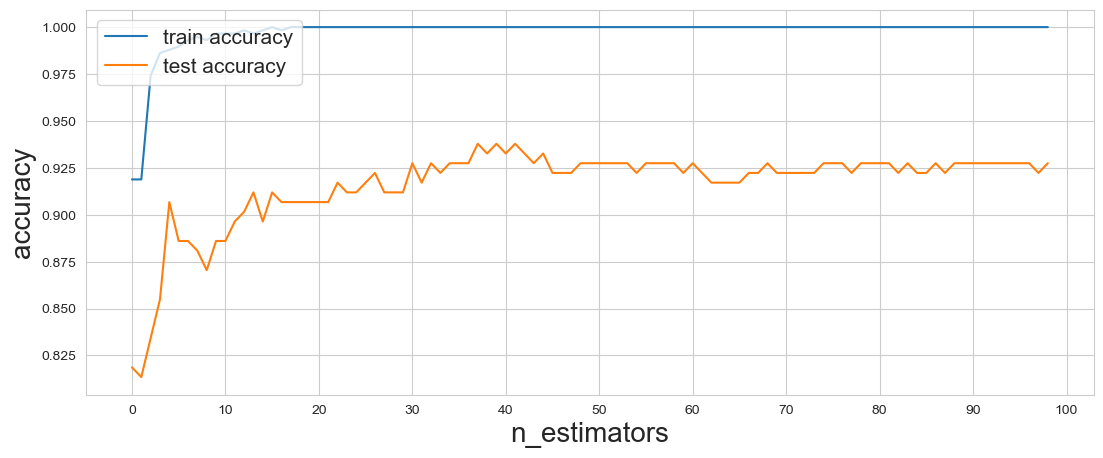

Max test accuracy: 0.9378238341968912 at 38 estimators


In [57]:
# Import SMOTEENN
from imblearn.combine import SMOTEENN

# This line ensures that the plot is displayed inside the notebook
%matplotlib inline

# initialize lists to store accuracies for training and test data we start with 50% accuracy
train_accuracies = []
test_accuracies = []

# iterate over a few depth values
for n in range(1, 100):
    
    # Split into test and train sets
    X = data_rf[cols]
    y = data_rf['uACR']
    
    # Oversample minority classes
    oversample = SMOTEENN(sampling_strategy='not majority', random_state=42)
    X_over, y_over = oversample.fit_resample(X, y)
    
    # Shuffle dataframes abd reset indices after shuffling
    X_over = X_over.sample(frac=1, random_state=42).reset_index(drop=True)
    y_over = y_over.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Split the oversampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

    # Define parameters for random forest model
    clf = RandomForestClassifier(n_estimators=n, random_state=42)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    #generate predictions on the training set
    train_predictions = clf.predict(X_train)

    # generate predictions on the test set
    test_predictions = clf.predict(X_test)

    # calculate the accuracy of predictions on training data set
    train_accuracy = metrics.accuracy_score(
    y_train, train_predictions
    )

    # calculate the accuracy of predictions on test data set
    test_accuracy = metrics.accuracy_score(
        y_test, test_predictions
    )

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create two plots using matplotlib # and seaborn
plt.figure(figsize=(13, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 101, 10))
plt.xlabel("n_estimators", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

# find max test accuracy
max_accuracy = max(test_accuracies)
max_n_estimators = test_accuracies.index(max(test_accuracies))+1

print(f"Max test accuracy: {max_accuracy} at {max_n_estimators} estimators")

Accuracy peaks at a little under 94% after iterating over 100 estimators

In [58]:
# Oversample minority classes
oversample = SMOTEENN(sampling_strategy='not majority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y2)

# Shuffle dataframes abd reset indices after shuffling
X_over = X_over.sample(frac=1, random_state=42).reset_index(drop=True)
y_over = y_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the oversampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

# Define parameters for random forest model
clf = RandomForestClassifier(n_estimators=max_n_estimators, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n", classification_rep)

Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.95      0.85      0.90        46
           2       0.92      0.99      0.96       124

    accuracy                           0.94       193
   macro avg       0.96      0.89      0.92       193
weighted avg       0.94      0.94      0.94       193

